In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
print('Setup Complete')

Setup Complete


In [2]:
filepath = '../input/students-performance-in-exams/StudentsPerformance.csv'
SData = pd.read_csv(filepath)
SData.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='lunch', ylabel='Count'>

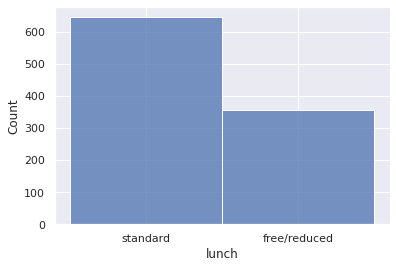

In [3]:
sns.histplot(data = SData['lunch'], label = 'lunch', kde = False)

In [4]:
SData.shape

(1000, 8)

In [5]:
SData['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

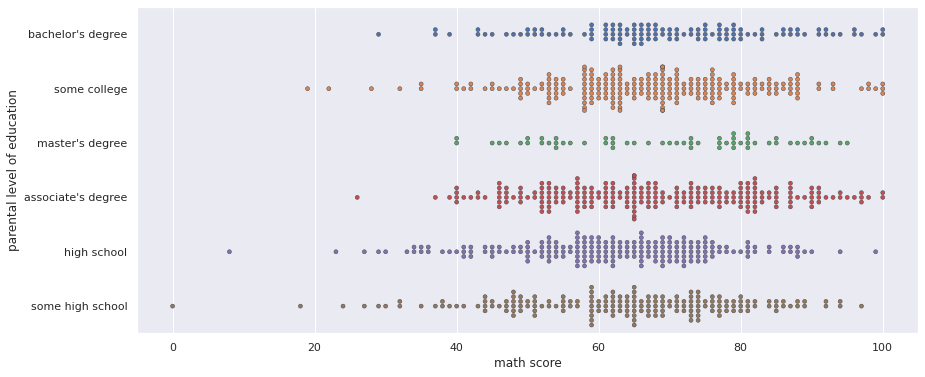

In [6]:
plt.figure(figsize = (14, 6))
sns.swarmplot(y = SData['parental level of education'], x = SData['math score'], s = 4, linewidth = 0.5)

<AxesSubplot:xlabel='writing score', ylabel='Count'>

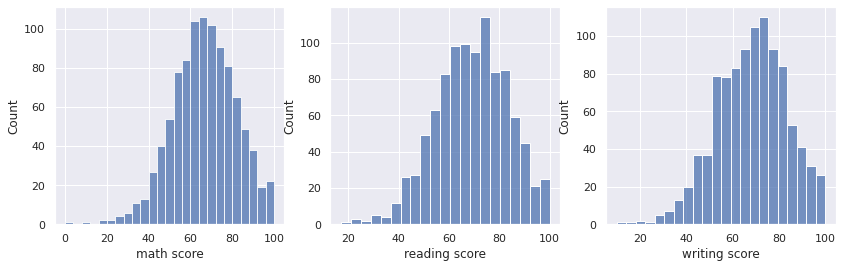

In [7]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 3, 1)

sns.histplot(data = SData['math score'], kde = False)

plt.subplot(1, 3, 2)

sns.histplot(data = SData['reading score'], kde = False)

plt.subplot(1, 3, 3)

sns.histplot(data = SData['writing score'], kde = False)

<AxesSubplot:ylabel='math score'>

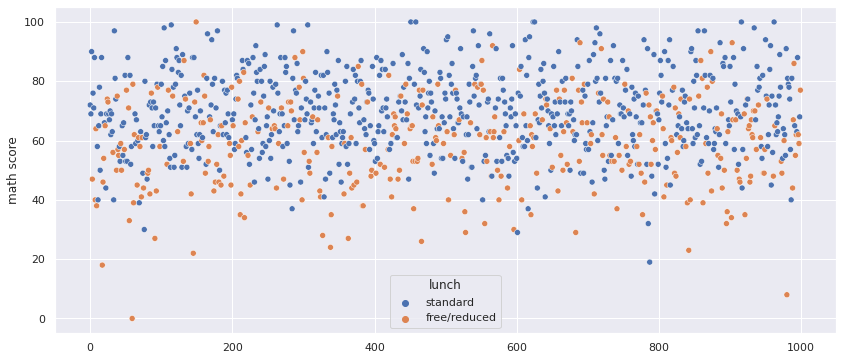

In [8]:
plt.figure(figsize = (14, 6))

sns.scatterplot(x = SData['lunch'].index, y = SData['math score'], hue = SData['lunch'])

<AxesSubplot:xlabel='gender', ylabel='math score'>

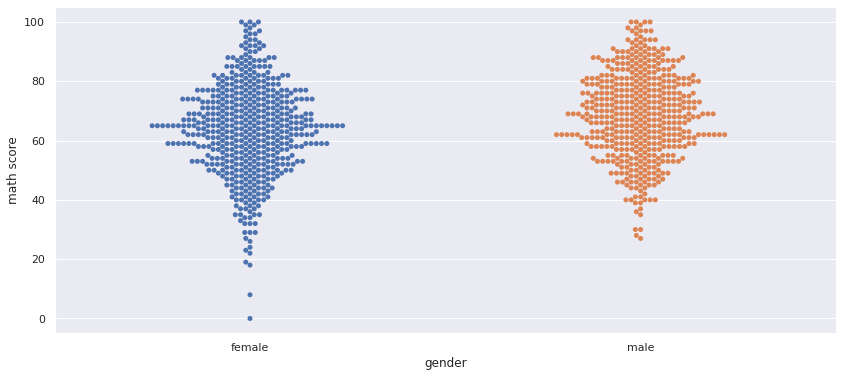

In [9]:
plt.figure(figsize = (14, 6))
sns.swarmplot(x = SData['gender'], y = SData['math score'])

<Figure size 1008x432 with 0 Axes>

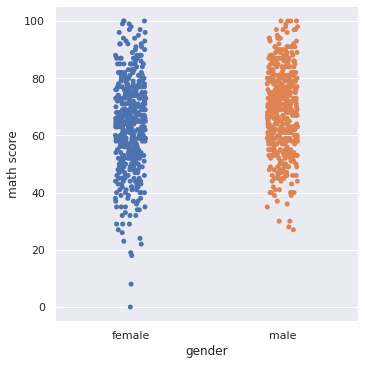

In [10]:
plt.figure(figsize = (14, 6))
sns.catplot(x = 'gender', y = 'math score', data = SData)

<Figure size 1008x432 with 0 Axes>

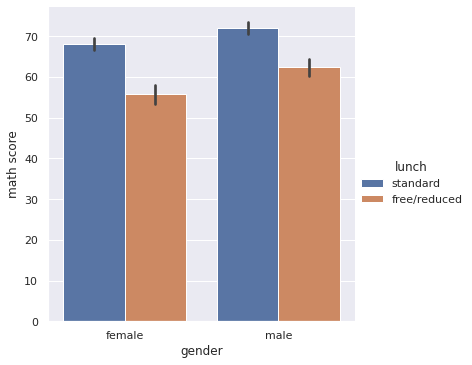

In [11]:
plt.figure(figsize = (14, 6))
sns.catplot(x = 'gender', y = 'math score', hue = 'lunch', kind = 'bar', data = SData)

<AxesSubplot:xlabel='gender', ylabel='math score'>

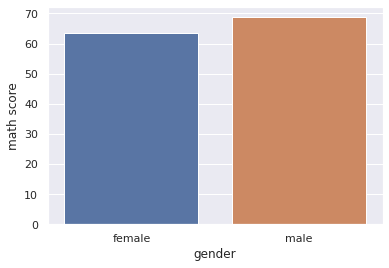

In [12]:
sns.barplot(x = SData['gender'], y = SData['math score'], ci = None)

In [13]:
SData['TotalScore'] = (SData['math score'] + SData['reading score'] + SData['writing score']) / 3

In [14]:
SData['TotalScore'] = SData['TotalScore'].round() 

In [15]:
SData.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [16]:
MeanT = SData.groupby('gender').TotalScore.mean()
print(MeanT)

gender
female    69.569498
male      65.819502
Name: TotalScore, dtype: float64


<AxesSubplot:xlabel='gender'>

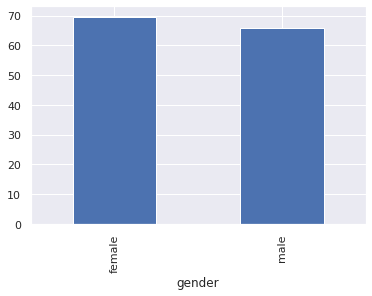

In [17]:
MeanT.plot(kind = 'bar')

In [18]:
REScore = SData.groupby('race/ethnicity').TotalScore.mean()

<AxesSubplot:xlabel='race/ethnicity'>

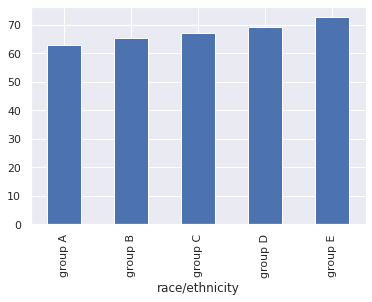

In [19]:
REScore.plot(kind = 'bar')

<AxesSubplot:xlabel='parental level of education'>

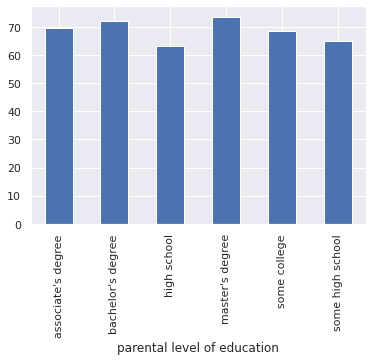

In [20]:
PScore = SData.groupby('parental level of education').TotalScore.mean()
PScore.plot(kind = 'bar')

<AxesSubplot:xlabel='lunch'>

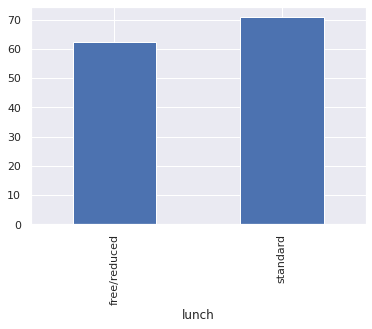

In [21]:
LScore = SData.groupby('lunch').TotalScore.mean()
LScore.plot(kind = 'bar')

<AxesSubplot:xlabel='test preparation course'>

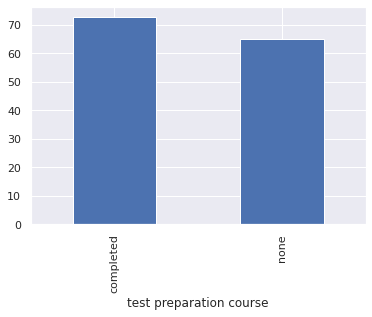

In [22]:
TPScore = SData.groupby('test preparation course').TotalScore.mean()
TPScore.plot(kind = 'bar')

<Figure size 1008x432 with 0 Axes>

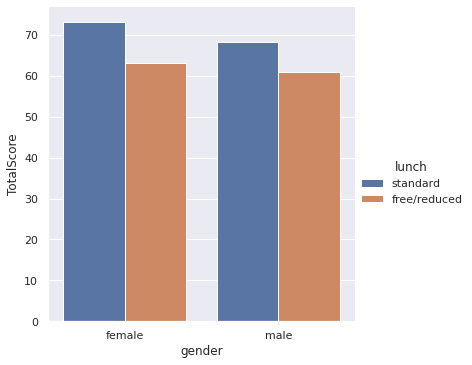

In [23]:
plt.figure(figsize = (14, 6))
sns.catplot(x = 'gender', y = 'TotalScore', hue = 'lunch', kind = 'bar', data = SData, ci = None)

<Figure size 1008x432 with 0 Axes>

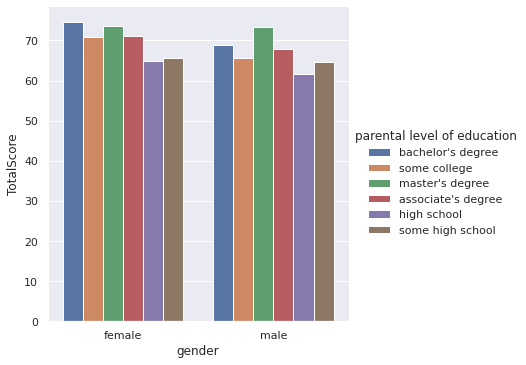

In [24]:
plt.figure(figsize = (14, 6))
sns.catplot(x = 'gender', y = 'TotalScore', hue = 'parental level of education', data = SData, kind = 'bar', ci = None)

<Figure size 1008x432 with 0 Axes>

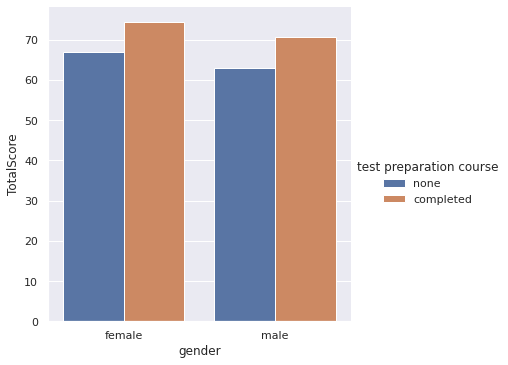

In [25]:
plt.figure(figsize = (14, 6))
sns.catplot(x = 'gender', y = 'TotalScore', hue = 'test preparation course', data = SData, kind = 'bar', ci = None)

<Figure size 1008x432 with 0 Axes>

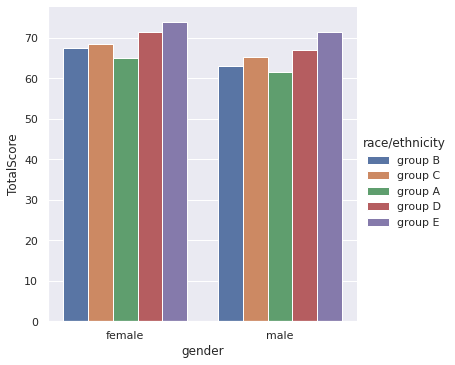

In [26]:
plt.figure(figsize = (14, 6))
sns.catplot(x = 'gender', y = 'TotalScore', hue = 'race/ethnicity', data = SData, kind = 'bar', ci = None)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

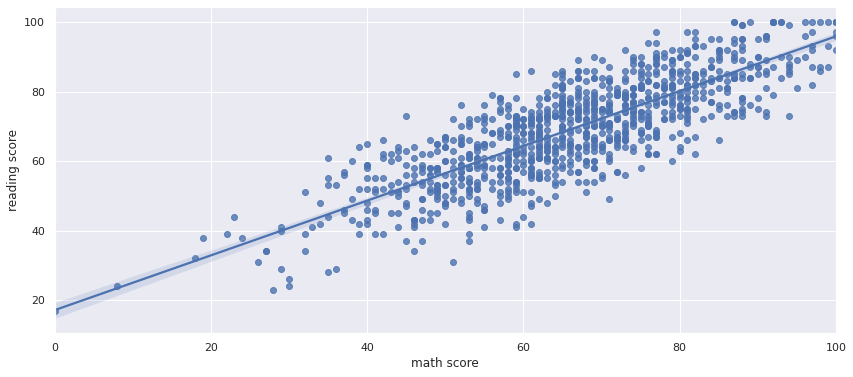

In [27]:
plt.figure(figsize = (14, 6))
sns.regplot(x = SData['math score'], y = SData['reading score'])

<AxesSubplot:xlabel='math score', ylabel='writing score'>

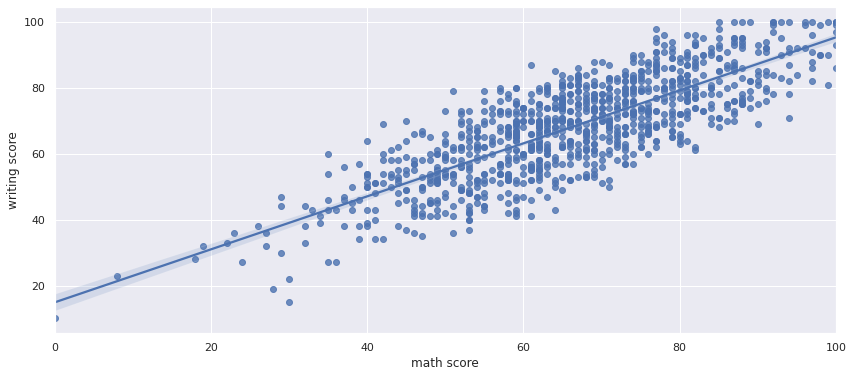

In [28]:
plt.figure(figsize = (14, 6))
sns.regplot(x = SData['math score'], y = SData['writing score'])

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

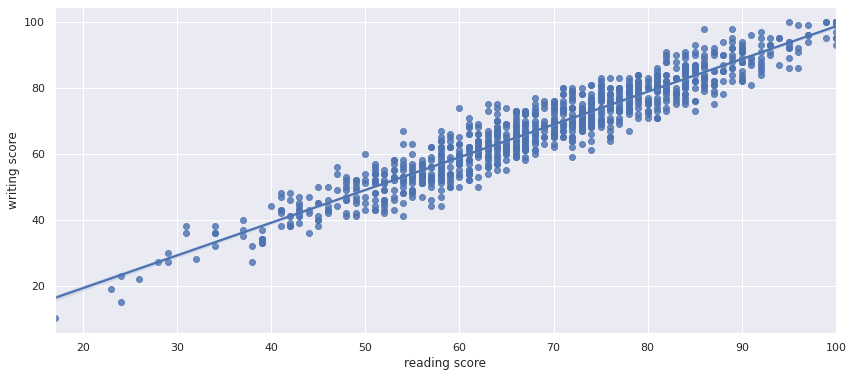

In [29]:
plt.figure(figsize = (14, 6))
sns.regplot(x = SData['reading score'], y = SData['writing score'])

<Figure size 1008x432 with 0 Axes>

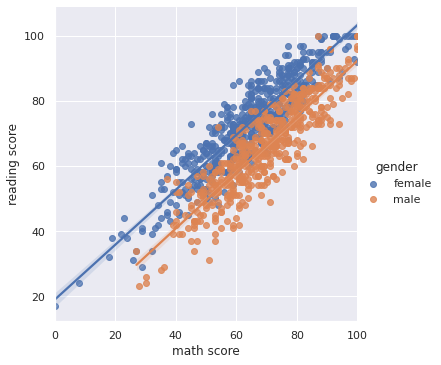

In [30]:
plt.figure(figsize = (14, 6))
sns.lmplot(x = 'math score', y = 'reading score', hue = 'gender', data = SData)

<Figure size 1008x432 with 0 Axes>

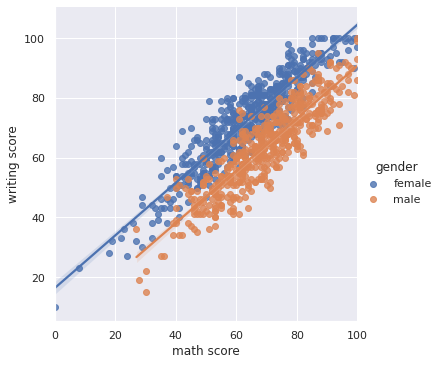

In [31]:
plt.figure(figsize = (14, 6))
sns.lmplot(x = 'math score', y = 'writing score', hue = 'gender', data = SData)

<Figure size 1008x432 with 0 Axes>

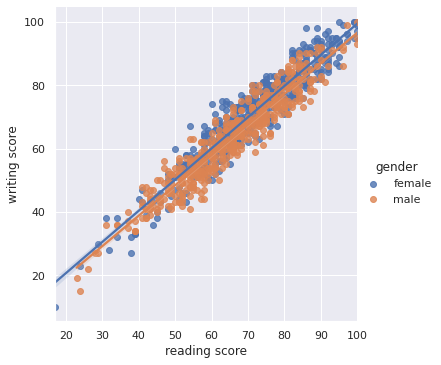

In [32]:
plt.figure(figsize = (14, 6))
sns.lmplot(x = 'reading score', y = 'writing score', hue = 'gender', data = SData)